In [131]:
import pandas as pd #I kinda did this yesterday when I was bored, I've done a bit of python before. These comments are meant to teach my wonderful group if they need help
import numpy as np
import seaborn as sns #Visualisation tool
import matplotlib.pyplot as plt#Visualisation tool
%matplotlib inline

In [133]:
student_df = pd.read_excel('./student.xlsx') #Im keeping mine in xlsx, you need to be careful with your .(s) because every other . makes you go BACK a folder. If you want an explanation about this lmk

In [135]:
student_df.head()#wow

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


In [137]:
student_df.info()#omgwowwwwwwwwwwwwwwwww

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35 non-null     int64 
 1   name    34 non-null     object
 2   class   34 non-null     object
 3   mark    35 non-null     int64 
 4   gender  33 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [138]:
student_df.describe()#dascrazy

,id,mark
count,35.000000,35.000000
mean,18.000000,74.657143
std,10.246951,16.401117
min,1.000000,18.000000
25%,9.500000,62.500000
50%,18.000000,79.000000
75%,26.500000,88.000000
max,35.000000,96.000000


In [141]:
student_df['name'].head(3)#wow it gives the names

0    John Deo
1    Max Ruin
2      Arnold
Name: name, dtype: object

In [142]:
student_df[['name','mark']].head(3)#wow it gives the names and marks :o 

,name,mark
0,John Deo,75
1,Max Ruin,85
2,Arnold,55


In [144]:
student_df.head(3)#wow it limits the rows to 3 :oooo

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male


In [146]:
student_df[student_df['class'] == 'Four'].head(3)#omg the displayed values of class are only given to the ones with four :OOOOOOOOOOOOOOOOOOOOOOOOO

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


In [148]:
student_df['passed'] = student_df['mark'] >= 60 #omg we set a passing mark to people above 60 das crazy!!!

In [151]:
student_df[['passed','name']].head(4)#You can check who passed and who didnt if you want to confirm

,passed,name
0,True,John Deo
1,True,Max Ruin
2,False,Arnold
3,True,Krish Star


In [152]:
student_df.rename(columns={'mark': 'score'}, inplace=True) #You use inplace=True to make permenant change to the DF, you can technically do it without it but whatever OMG DAZ CRAZYYYYYYYYYYY

In [154]:
student_df.drop(columns=['passed'], inplace=True)#And now we're dropping the Passed column because wowwwww python !!

In [156]:
#student_df['passed'] #There should be an error here because... well... you dropped the bloody passed column. If you want to get it back, restart over again. If you dont want to drop the column, restart or just put a # infront of the code

In [158]:
student_df['score'].head(3)#This is our renamed Mark column remember? OMG PYTHON WOW

0    75
1    85
2    55
Name: score, dtype: int64

In [160]:
student_df.groupby('class').agg('score').mean()#You do not have to use .agg, I use it because I like being extra and it gives me more room to add other stuff later. You can do student_df.groupby('class').agg({'mark': 'mean'})

class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     68.750000
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    73.666667
Name: score, dtype: float64

In [163]:
student_df.groupby('class').agg({
   'score': ['mean', 'min', 'max', 'count']
})                                                       #Example of other stuff you do with .agg()

score              
            mean min max count
class                         
Eight  79.000000  79  79     1
Fifth  78.000000  78  78     1
Five   80.000000  75  85     2
Four   68.750000  55  88     8
Nine   41.500000  18  65     2
Seven  77.600000  55  90    10
Six    82.571429  54  96     7
Three  73.666667  55  85     3

In [165]:
student_df['class'].value_counts()#quick and easy, this is what you should do probably

class
Seven    10
Four      8
Six       7
Three     3
Five      2
Nine      2
Fifth     1
Eight     1
Name: count, dtype: int64

In [167]:
student_df.groupby(['class','gender']).size()#Can use .size(), this is the first time Im actually using it I got bored, you use it for groupby(['xx','yy'] when you wanna be flexible and do more counting

class  gender
Eight  male      1
Fifth  male      1
Five   male      2
Four   female    5
       male      3
Nine   female    1
       male      1
Seven  female    5
       male      5
Six    female    5
       male      1
Three  male      2
dtype: int64

In [171]:
student_df.groupby('gender')['score'].mean()

gender
female    77.312500
male      71.588235
Name: score, dtype: float64

In [ ]:
#Okay so now we're doing pivot tables, honestly first time doing this so I will consult GPT a bit

In [175]:
student_df.pivot_table(values = 'score', index='class', columns='gender', aggfunc = 'mean')#So for a lot of the females, some of the values are just MISSING, that seems odd, except you should look at what data you have.

gender,female,male
class,,
Eight,NaN,79.0
Fifth,NaN,78.0
Five,NaN,80.0
Four,63.8,77.0
Nine,65.0,18.0
Seven,81.4,73.8
Six,89.2,54.0
Three,NaN,70.0


In [177]:
student_df[student_df['score'].isna()]#Honestly I didnt even look at my data earlier, I do this to see the dropped values. But in the groupby() you can see theres no females in a lot of the classes, hence the NaN values

,id,name,class,score,gender


In [179]:
def assign_grade(score):
    if score >= 85:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 60:
        return 'C'
    else:
        return 'D'

student_df['grade'] = student_df['score'].apply(assign_grade)

In [181]:
student_df['grade'].head(10)

0    B
1    A
2    D
3    C
4    C
5    D
6    B
7    A
8    B
9    D
Name: grade, dtype: object

In [183]:
student_df.sort_values(by='score', ascending=False).head(10)

,id,name,class,score,gender,grade
32,33,Kenn Rein,Six,96,female,A
11,12,Recky,Six,94,female,A
31,32,Binn Rott,Seven,90,female,A
10,11,Ronald,Six,89,female,A
24,25,Giff Tow,Seven,88,male,A
15,16,Gimmy,Four,88,male,A
14,15,Tade Row,NaN,88,male,A
13,14,Bigy,Seven,88,female,A
12,13,Kty,Seven,88,female,A
34,35,Rows Noump,Six,88,female,A


In [29]:
student_df.to_csv('students_with_grades.csv')

In [30]:
sorted_student = student_df.sort_values(by='score', ascending=True).reset_index(drop=True)

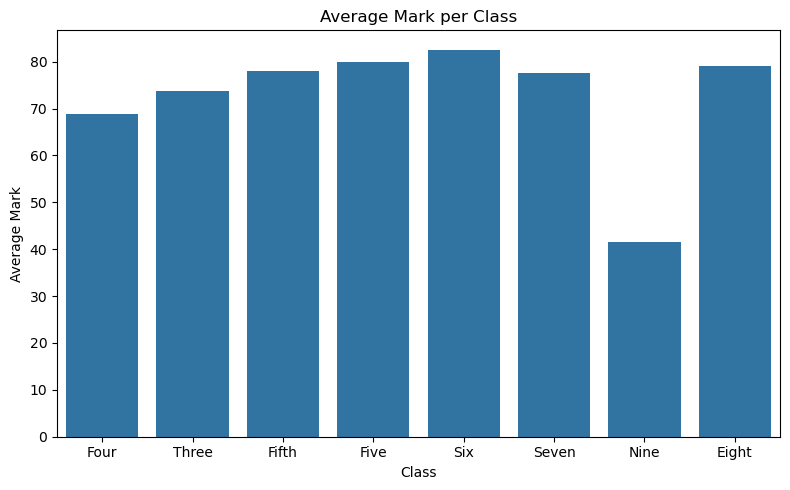

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(data=student_df, x='class', y='score', errorbar=None, estimator='mean')
plt.title('Average Mark per Class')
plt.ylabel('Average Mark')
plt.xlabel('Class')
plt.tight_layout()
plt.show()

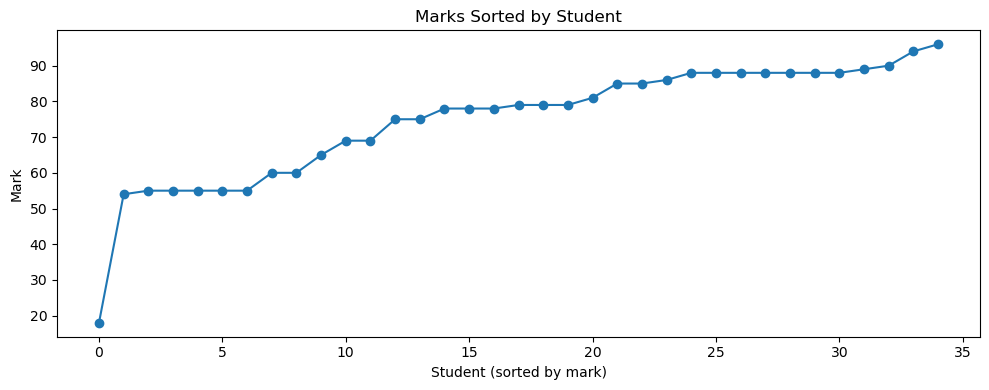

In [32]:
plt.figure(figsize=(10, 4))
plt.plot(sorted_student['score'], marker='o')
plt.title('Marks Sorted by Student')
plt.xlabel('Student (sorted by mark)')
plt.ylabel('Mark')
plt.tight_layout()
plt.show()

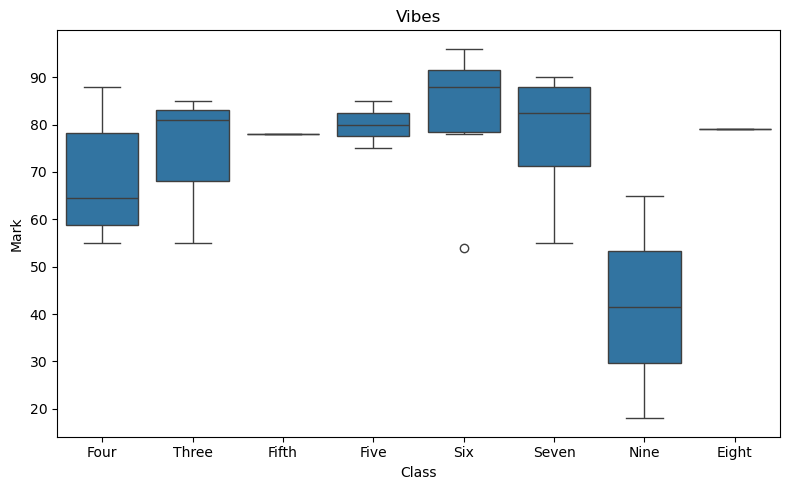

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=student_df, x='class', y='score')
plt.title('Vibes')
plt.ylabel('Mark')
plt.xlabel('Class')
plt.tight_layout()
plt.show()

In [34]:
#We can conclude that Class9... might be a bit cooked

In [40]:
# Example quantitative data
data = pd.DataFrame({'Score': [45, 67, 89, 56, 71, 90, 33]})

# Convert to categories (e.g., Low, Medium, High)
data['Category'] = pd.cut(data['Score'],
                          bins=[0, 50, 70, 100],
                          labels=['Low', 'Medium', 'High'])

print(data)

   Score Category
0     45      Low
1     67   Medium
2     89     High
3     56   Medium
4     71     High
5     90     High
6     33      Low
